# Import libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import textblob

# Read data

In [2]:
women = pd.read_csv("Womens Clothing E-Commerce Reviews.csv")

In [3]:
women.head()

,Unnamed: 0,Clothing ID,Age,Title,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name
0,0,767,33,NaN,Absolutely wonderful - silky and sexy and comf...,4,1,0,Initmates,Intimate,Intimates
1,1,1080,34,NaN,Love this dress! it's sooo pretty. i happene...,5,1,4,General,Dresses,Dresses
2,2,1077,60,Some major design flaws,I had such high hopes for this dress and reall...,3,0,0,General,Dresses,Dresses
3,3,1049,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",5,1,0,General Petite,Bottoms,Pants
4,4,847,47,Flattering shirt,This shirt is very flattering to all due to th...,5,1,6,General,Tops,Blouses


# EDA

## drop irrelevant columns

In [4]:
women_c = women.drop(["Unnamed: 0", 'Clothing ID', 'Age', 'Recommended IND', 'Positive Feedback Count', 'Class Name'], axis =1)

In [5]:
women_c.columns = women_c.columns.str.lower()

In [6]:
women_c

,title,review text,rating,division name,department name
0,NaN,Absolutely wonderful - silky and sexy and comf...,4,Initmates,Intimate
1,NaN,Love this dress! it's sooo pretty. i happene...,5,General,Dresses
2,Some major design flaws,I had such high hopes for this dress and reall...,3,General,Dresses
3,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",5,General Petite,Bottoms
4,Flattering shirt,This shirt is very flattering to all due to th...,5,General,Tops
...,...,...,...,...,...
23481,Great dress for many occasions,I was very happy to snag this dress at such a ...,5,General Petite,Dresses
23482,Wish it was made of cotton,"It reminds me of maternity clothes. soft, stre...",3,General Petite,Tops
23483,"Cute, but see through","This fit well, but the top was very see throug...",3,General Petite,Dresses
23484,"Very cute dress, perfect for summer parties an...",I bought this dress for a wedding i have this ...,3,General,Dresses


## explore data

In [7]:
women_c.isna().sum()

title              3810
review text         845
rating                0
division name        14
department name      14
dtype: int64

In [8]:
women_c.shape

(23486, 5)

In [9]:
women_c.describe()

,rating
count,23486.000000
mean,4.196032
std,1.110031
min,1.000000
25%,4.000000
50%,5.000000
75%,5.000000
max,5.000000


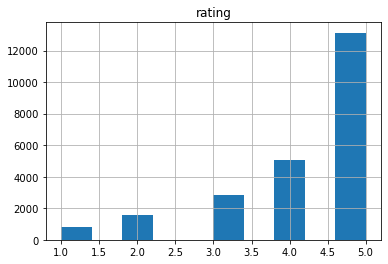

In [10]:
women_c.hist();

# Summarise the average rating by division and department

## Create dataframe

In [11]:
df_by_div_dep = women_c.groupby(['division name', 'department name' ]).agg({'rating':'mean'})

In [12]:
df_by_div_dep

rating
division name  department name          
General        Bottoms          4.268686
               Dresses          4.163003
               Jackets          4.240310
               Tops             4.148749
               Trend            3.822917
General Petite Bottoms          4.329356
               Dresses          4.133256
               Intimate         4.240343
               Jackets          4.304910
               Tops             4.216469
               Trend            3.782609
Initmates      Intimate         4.286285

## Visualization

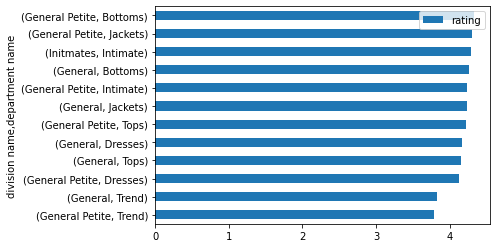

In [13]:
df_by_div_dep.sort_values('rating').plot.barh(stacked=True);

# Import more libraries

In [14]:
import textblob
from textblob import TextBlob

# Get sentiment rate from some reviews

In [15]:
review5 = women_c["review text"].iloc[5]
review67 = women_c["review text"].iloc[67]
review1111 = women_c["review text"].iloc[1111]

In [16]:
sent5 = TextBlob(review5).sentiment
sent67 = TextBlob(review67).sentiment
sent1111 = TextBlob(review1111).sentiment

In [17]:
sent5

Sentiment(polarity=0.17874999999999996, subjectivity=0.533125)

In [18]:
sent67

Sentiment(polarity=0.3402678571428572, subjectivity=0.5475309065934066)

In [19]:
sent1111

Sentiment(polarity=0.04907407407407408, subjectivity=0.47314814814814815)

# Split some reviews into sentences

In [20]:
TextBlob(review5).sentences

[Sentence("I love tracy reese dresses, but this one is not for the very petite."),
 Sentence("i am just under 5 feet tall and usually wear a 0p in this brand."),
 Sentence("this dress was very pretty out of the package but its a lot of dress."),
 Sentence("the skirt is long and very full so it overwhelmed my small frame."),
 Sentence("not a stranger to alterations, shortening and narrowing the skirt would take away from the embellishment of the garment."),
 Sentence("i love the color and the idea of the style but it just did not work on me."),
 Sentence("i returned this dress.")]

In [21]:
TextBlob(review67).sentences

[Sentence("Love this top!"),
 Sentence("i kept eyeing it online and wavering on size, since my post-baby body is a little wonky."),
 Sentence("i went with the xsp, and miraculously, it works perfectly!"),
 Sentence("so, i would say it does run just a little large..... i love the length, and usually do not go with petite sizes at retailer because i like the longer lengths of the regular."),
 Sentence("but this is perfect on me, and there is give up top, so it looks lovely."),
 Sentence("and it is very soft and comfortable."),
 Sentence("this will be a go-to top this season!")]

In [22]:
TextBlob(review1111).sentences

[Sentence("Unfortunately i had to size down twice with there pants."),
 Sentence("great feel, they're soft and the grey is a soft color.")]

# Drop nulls from reviews column

In [23]:
women_c.dropna(subset = ['review text'], inplace = True)

In [24]:
women_c.shape

(22641, 5)

# Add sentiment column to dataframe

In [47]:
women_c['sentiment'] = women_c['review text'].apply(lambda x:TextBlob(x).sentiment.polarity)

In [27]:
women_c

,title,review text,rating,division name,department name,sentiment
0,NaN,Absolutely wonderful - silky and sexy and comf...,4,Initmates,Intimate,0.633333
1,NaN,Love this dress! it's sooo pretty. i happene...,5,General,Dresses,0.339583
2,Some major design flaws,I had such high hopes for this dress and reall...,3,General,Dresses,0.073675
3,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",5,General Petite,Bottoms,0.550000
4,Flattering shirt,This shirt is very flattering to all due to th...,5,General,Tops,0.512891
...,...,...,...,...,...,...
23481,Great dress for many occasions,I was very happy to snag this dress at such a ...,5,General Petite,Dresses,0.552667
23482,Wish it was made of cotton,"It reminds me of maternity clothes. soft, stre...",3,General Petite,Tops,0.091667
23483,"Cute, but see through","This fit well, but the top was very see throug...",3,General Petite,Dresses,0.414286
23484,"Very cute dress, perfect for summer parties an...",I bought this dress for a wedding i have this ...,3,General,Dresses,0.322222


# Summarise the minimum sentiment rate by division and department

## Create dataframe

In [31]:
min_sent_by_div_dep = women_c.groupby(['division name', 'department name' ]).agg({'sentiment':'min'})

In [32]:
min_sent_by_div_dep

sentiment
division name  department name           
General        Bottoms          -0.533333
               Dresses          -0.916667
               Jackets          -0.750000
               Tops             -0.975000
               Trend            -0.270833
General Petite Bottoms          -0.257778
               Dresses          -0.400000
               Intimate         -0.575000
               Jackets          -0.562500
               Tops             -0.700000
               Trend            -0.083333
Initmates      Intimate         -0.392333

## Visualization

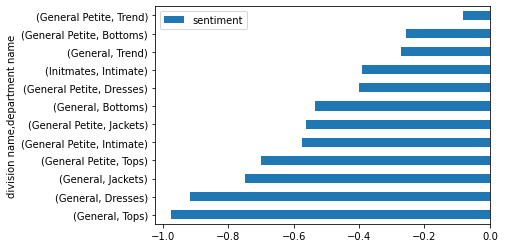

In [45]:
min_sent_by_div_dep.sort_values('sentiment').plot.barh(stacked=True);

# Summarise the average sentiment rate by division and department

## Create Dataframe

In [40]:
avg_sent_by_div_dep = women_c.groupby(['division name', 'department name' ]).agg({'sentiment':'mean'})
avg_sent_by_div_dep

sentiment
division name  department name           
General        Bottoms           0.245849
               Dresses           0.251091
               Jackets           0.237141
               Tops              0.247025
               Trend             0.203986
General Petite Bottoms           0.259258
               Dresses           0.248380
               Intimate          0.239517
               Jackets           0.241773
               Tops              0.256835
               Trend             0.195925
Initmates      Intimate          0.256979

## Visualization

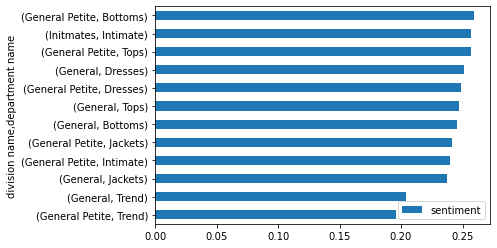

In [44]:
avg_sent_by_div_dep.sort_values('sentiment').plot.barh(stacked=True);

# Accuracy of the calculated sentiment polarities

In [52]:
women_c['sentiment_accuracy'] = women_c['review text'].apply(lambda x:TextBlob(x).sentiment.subjectivity)

In [53]:
women_c

,title,review text,rating,division name,department name,sentiment,sentiment_accuracy
0,NaN,Absolutely wonderful - silky and sexy and comf...,4,Initmates,Intimate,0.633333,0.933333
1,NaN,Love this dress! it's sooo pretty. i happene...,5,General,Dresses,0.339583,0.725000
2,Some major design flaws,I had such high hopes for this dress and reall...,3,General,Dresses,0.073675,0.356294
3,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",5,General Petite,Bottoms,0.550000,0.625000
4,Flattering shirt,This shirt is very flattering to all due to th...,5,General,Tops,0.512891,0.568750
...,...,...,...,...,...,...,...
23481,Great dress for many occasions,I was very happy to snag this dress at such a ...,5,General Petite,Dresses,0.552667,0.710000
23482,Wish it was made of cotton,"It reminds me of maternity clothes. soft, stre...",3,General Petite,Tops,0.091667,0.708333
23483,"Cute, but see through","This fit well, but the top was very see throug...",3,General Petite,Dresses,0.414286,0.596429
23484,"Very cute dress, perfect for summer parties an...",I bought this dress for a wedding i have this ...,3,General,Dresses,0.322222,0.577778
